# Piano in a notebook

I don't know a lot about music theory, but I enjoy listening to result. What I do know a lot about is digital signal processing. In this post we are going to implement a very simple piano that plays inside the notebook and the theory behind it. This post is heavily inspired by the post ["How to Play Music Using Mathematics in Python"](https://towardsdatascience.com/mathematics-of-music-in-python-b7d838c84f72) from [Nishu Jain](https://nishu-jain.medium.com/).

Before we look into a piano though, lets have a look what [Wikipedia](https://wikipedia.org) has to say about sound in general.

In [1]:
import IPython.display

IPython.display.IFrame("https://en.M.wikipedia.org/wiki/Sound", width=1000, height=510)

Thus, the first step that we need to solve is the ability to create `sound_wave` given a specific `frequency`. Mathematically, a soundwave is defined by

In [2]:
IPython.display.Math(r"A\left(t\right) \cdot \text{sin}\left(2 \cdot \pi \cdot f\left(t\right) \cdot t\right)")

<IPython.core.display.Math object>

where $A$ denotes the amplitude, $f$ the frequency, and $t$ the time. The amplitude $A\left(t\right)$ determines how loud a sound is and the frequency $f\left(t\right)$ determines the pitch. In general they vary with the time $t$, but we are going to ignore this thorughout this post for simplicity and assume they are constant.

The above definition assumes that the time $t$ flows continously, but this not the case for digital signals: we can only sample a continous wave in finite intervals denoted by the `sample_rate`. If the `sample_rate` is high enough the human ear and brain is no longer able to differentiate between a continous and a sampled sound wave. For example a `sample_rate` of $44.1 \text{kHz}$ is often used in [MP3](https://en.wikipedia.org/wiki/MP3) files.

Equipped with this knowledge and [`numpy`](https://numpy.org) at our fingertips, we can now create a `sound_wave`

In [3]:
import numpy

def sound_wave(frequency, *, sample_rate=44_100, duration=0.5):
    num_samples = int(sample_rate * duration)
    time = numpy.linspace(0, duration, num_samples)
    return numpy.sin(2 * numpy.pi * frequency * time)

Let's listen to an example sound wave of $1 \text{kHz}$ (this might sound unpleasant)

In [4]:
example_sound_wave = sound_wave(frequency=1e3)
IPython.display.Audio(data=example_sound_wave, rate=44_100, autoplay=True)

We can also take a look at it

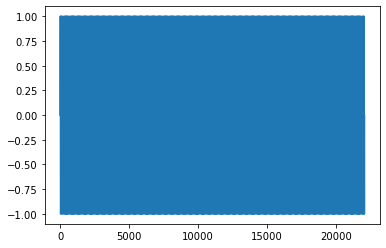

In [5]:
import matplotlib.pyplot

matplotlib.pyplot.plot(example_sound_wave)

Well, that doesn't look like a wave at all. The reason is simple: within a `duration=0.5` seconds the wave with a `frequency=1e3` completes

In [6]:
0.5 * 1e3

500.0

cycles. Thus, if we want to see the wave we need to look at a smaller time window, for example $3 \text{ms}$

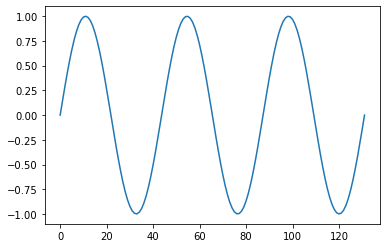

In [7]:
matplotlib.pyplot.plot(sound_wave(frequency=1e3, duration=3e-3))

## Minimal piano theory

Since I know so little about pianos, I'm just going to quote [Nishu Jain](https://nishu-jain.medium.com/) directly (adapting the Python notation):

> As mentioned earlier, a piano consists of multiple octaves. Although every octave is physically identical, it may sound a bit high-pitched or low-pitched with respect to the other.
>
> If we want to create a single octave (set of 12 keys), then we must know how each key is calibrated in relation to the other. After that, we can just double (or half) the frequency of all the keys, to get the next octave.
>
> Pianos are tuned using an “equal temperament system”. That means the relationship between the frequency of the keys (notes) is like this —
>
> `frequency == base_frequency * 2 ** (n / 12)`
>
> Where n is the number of notes away from the base note.
>
> For example, if we consider C as our base note, then C# will have the `frequency = base_frequency * 2 ** (1/12)`

With this formula we can now pick a `base_frequency` and enumerate all `notes` in an octave with the corresponding `note_frequencies`.

In [8]:
notes = ('C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B')
base_frequency = 261.63 # frequency of Note C4

note_frequencies = dict(zip(notes, base_frequency * 2 ** (numpy.arange(len(notes)) / 12)))

from pprint import pprint
                        
pprint(note_frequencies, sort_dicts=False)

{'C': 261.63,
 'c': 277.18732937722245,
 'D': 293.66974569918125,
 'd': 311.1322574981619,
 'E': 329.63314428399565,
 'F': 349.2341510465061,
 'f': 370.00069432367286,
 'G': 392.0020805232462,
 'g': 415.31173722644,
 'A': 440.00745824565865,
 'a': 466.1716632541139,
 'B': 493.8916728538229}


In a final step we can now compose a song with [`numpy.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate).

In [9]:
def play(*notes, sample_rate=44_100, note_duration=0.5):
    data = numpy.concatenate(
        [
            sound_wave(
                frequency, 
                sample_rate=sample_rate, 
                duration=note_duration,
            ) 
            for frequency in [note_frequencies.get(note, 0.0) for note in notes]
        ]
    )
    return IPython.display.Audio(data=data, rate=sample_rate, autoplay=True)

Let's try it with [Twinkle, Twinkle, Little Star](https://en.wikipedia.org/wiki/Twinkle,_Twinkle,_Little_Star)

In [10]:
twinkle_twinkle_little_star = "CCGGAAG FFEEDDC GGFFEED GGFFEED CCGGAAG FFEEDDC"
play(*twinkle_twinkle_little_star)

It doesn't sound good, but we can make out the song. Can we also play it a little faster?

In [11]:
play(*twinkle_twinkle_little_star, note_duration=0.4)

Works!

## Conclusion

In this post we took a quick look into music theory, how pianos work, and how we can use that knowledge to play the piano inside a notebook. Granted, the player we implemented is

- playing only with a single finger,
- never leaving a single octave
- never varying the tempo, and 
- pushing the keys infintely fast and the piano doing the same to the string.

but we could out make out a song from the result. Still, for more elaborate projects one might use [`pypiano`](https://github.com/FelixGSE/pypiano) or [`mingus`](http://bspaans.github.io/python-mingus/index.html) as backend.


